# Challenge Modelos Regressivos

Questão 1: 
- Todas já que ela depende para realizarmos as outras questões
 
Questão 2:

-       Maria Fernanda
-       Juliana
 
Questão 3:
-       Bethania
-       Rayssa
-       Yasmim
-       Patricia

# Desafio: Estimando o Preço do Imóvel

Suponha que você trabalha em uma empresa do setor imobiliário. Para essa empresa é muito importante precificar corretamente o imóvel, caso contrário, os corretores podem perder a venda. Como parte do time de dados, você é responsável por analisar os principais fatores que podem afetar o preço dos imóveis. Para isso, eles te enviaram a base de dados (desafio_01_preco_imoveis.csv). Como você poderia ajudá-los?

Para responder esse desafio: A base de dados: desafio_01_preco_imoveis.csv contém as seguintes informações:

- id : código identificador do imóvel

- date: data em que o imóvel foi cadastrado

- price: preço do imóvel

- bedrooms: número de quartos

- bathrooms: número de banheiros

- sqft_living: tamanho do imóvel (dentro da casa)

- sqft_lot: tamanho do lote / terreno

- floors: andares

- waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso
contrário.

- view: indica o número de quartos com vista.

- condition: condição do imóvel, escala de 1 a 5

- grade: nota do imóvel

- sqft_above: tamanho da casa acima do solo (excluindo porão)

- sqft_basement: tamanho do porão

- yr_built: ano em que a casa foi construída

- yr_renovated: ano em que a casa foi renovada

- zipcode: "CEP" do imóvel

- lat: latitude do imóvel

- long: longitude do imóvel

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Abrindo o dataset e analisando suas primeiras linhas
df = pd.read_csv('./desafio_01_preco_imoveis230209164627-230918-093224.csv', sep=',')

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [3]:
# Vendo o tamanho do dataset
linhas, colunas = df.shape
print(f'O dataset tem {linhas} linhas e {colunas} colunas')

O dataset tem 21613 linhas e 19 colunas


In [4]:
# Analisando o dataset - verificando o tipo de dados de cada coluna e se há dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Estatística descritiva inicial dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


1 - Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.

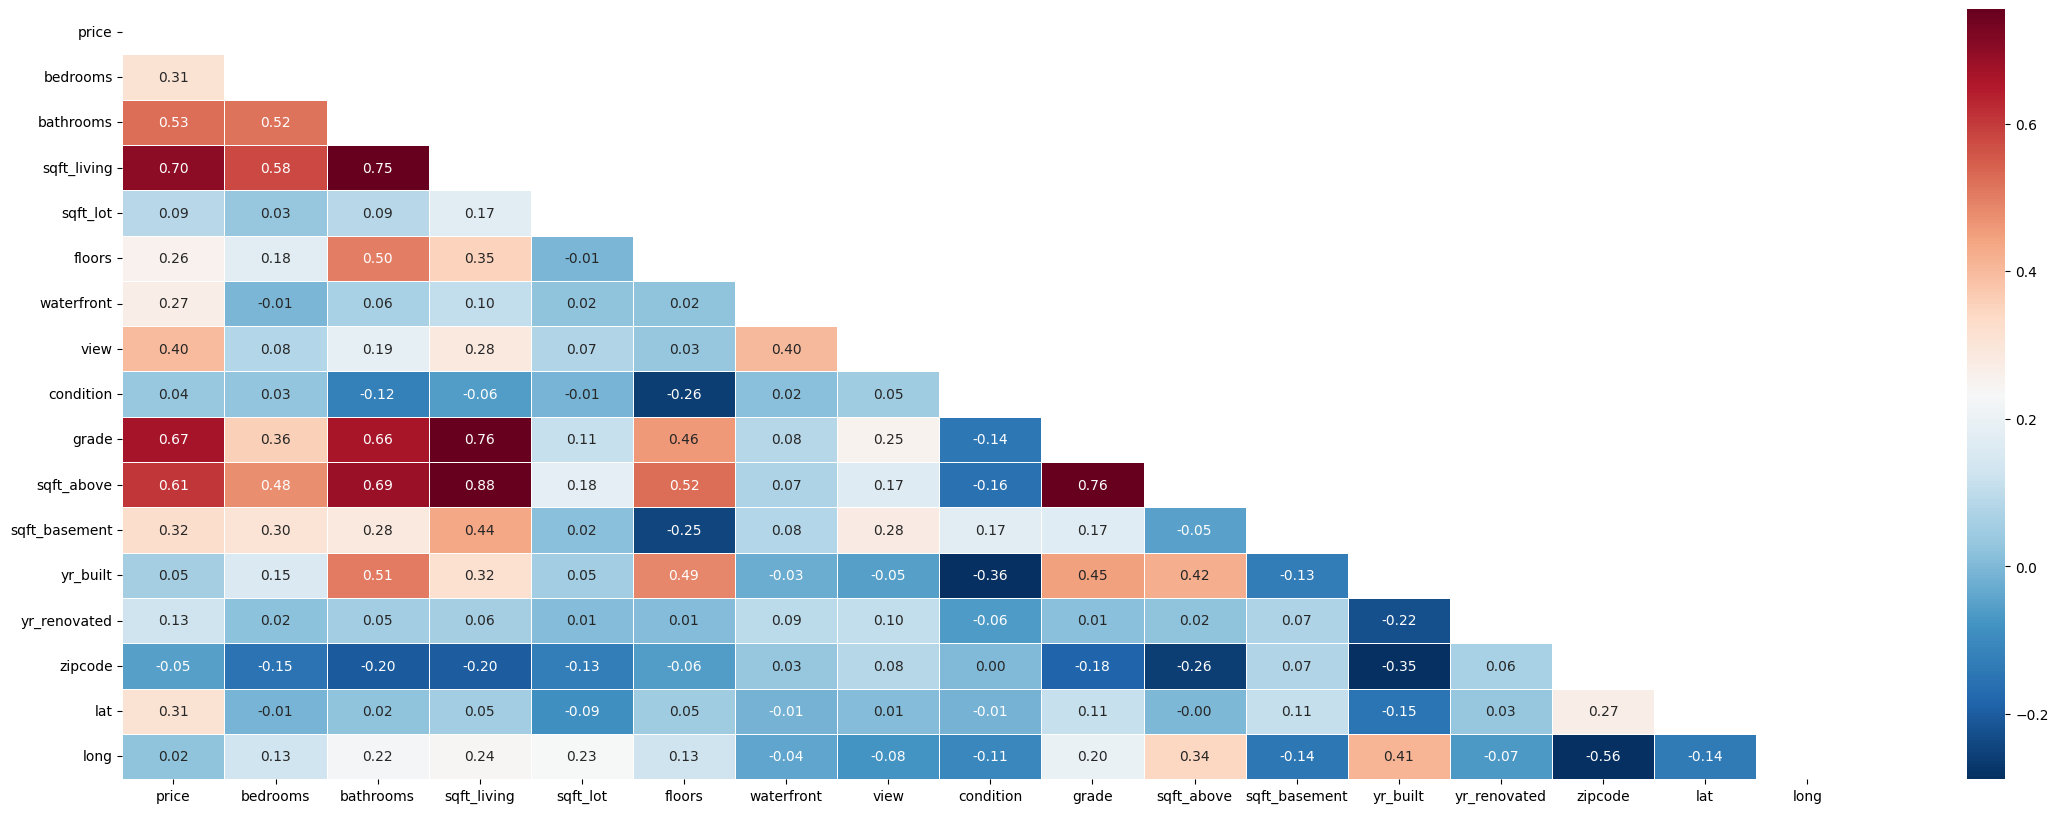

In [6]:
# Selecionando as features utilizando correlação para eliminar as variáveis com maiores correlações

# Eliminando as variaveis não numericas 
df_num = df.drop(['id',	'date'], axis = 1) 

# Gráfico de correlação entre todas as variaveis numericas
price_corr = df_num.corr()

plt.figure(figsize=(28, 10))

# Obtendo apenas a matriz triangular inferior
mask = np.triu(np.ones_like(price_corr, dtype=bool))

sns.heatmap(price_corr,
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",
            mask=mask,
            xticklabels=True,
            robust=True,
            linewidth=0.4)

plt.show()

Highly correlated features: sqft_above, grade, sqft_living


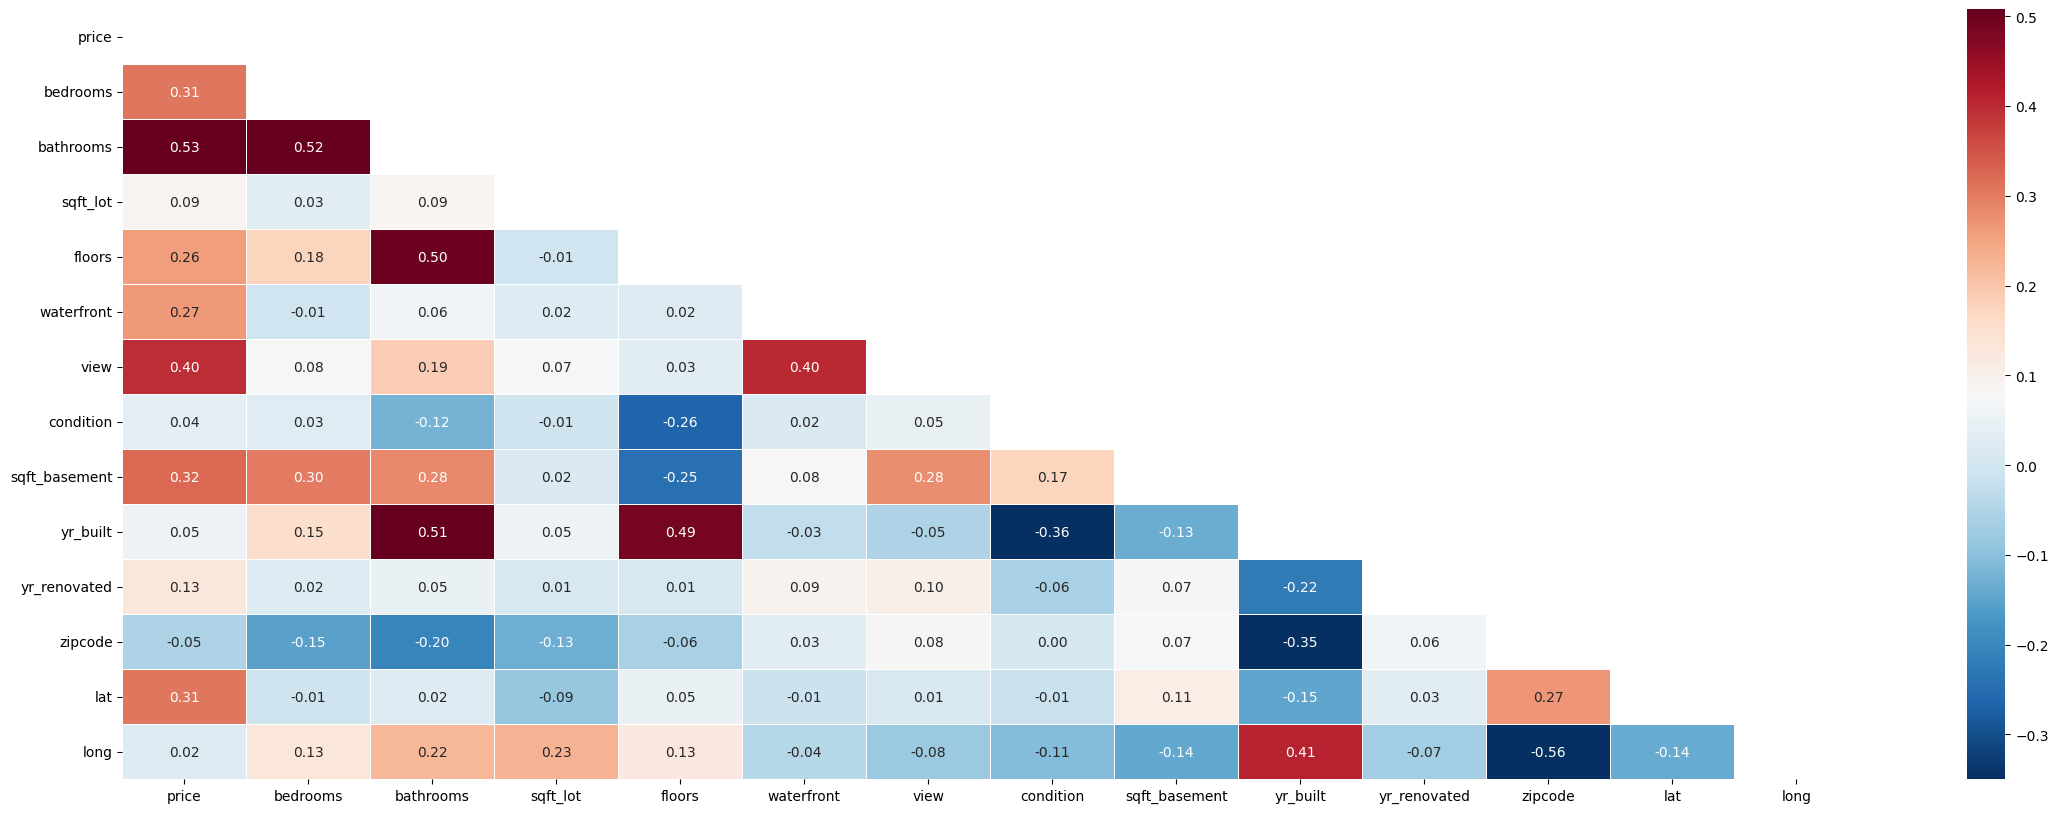

In [7]:
# Eliminando as correlações > 0.7
corr = df_num.corr()
corr_top = corr.abs().unstack().sort_values(kind='quicksort')
corr_top = corr_top[corr_top > 0.7][corr_top < 1]

cols_to_drop = set([corr_top.index[i][0] for i in range(0, len(corr_top), 2)])
print(f"Highly correlated features: {', '. join(cols_to_drop)}")
df_num = df_num.drop(columns=cols_to_drop)

# Gráfico de correlaçæo entre todas as variaveis numericas
price_corr = df_num.corr()

plt.figure(figsize=(28, 10))

# Obtendo apenas a matriz triangular inferior
mask = np.triu(np.ones_like(price_corr, dtype=bool))

sns.heatmap(price_corr,
            annot=True,
            fmt=".2f",
            cmap="RdBu_r",
            mask=mask,
            xticklabels=True,
            robust=True,
            linewidth=0.4)

plt.show()

# Fazendo por SelectKBest

In [8]:
# Importing libraries
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#  Separate your features (X) from your target variable (y)
X = df.drop(columns=["price", "id", "date"])  # Removing 'id' and 'date' columns as they might not be relevant for prediction
y = df["price"]

# 4. Use SelectKBest to select the top k best features
k = 5  # you can change this value to select a different number of features
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {selected_features}")

# 5. Fit a linear regression model using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Selected Features: Index(['bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above'], dtype='object')
Mean Squared Error: 63632318736.88203


2 - Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados

In [9]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
# Definindo x e y
y = df_num['price']
X = df_num.drop(['price'], axis=1) 

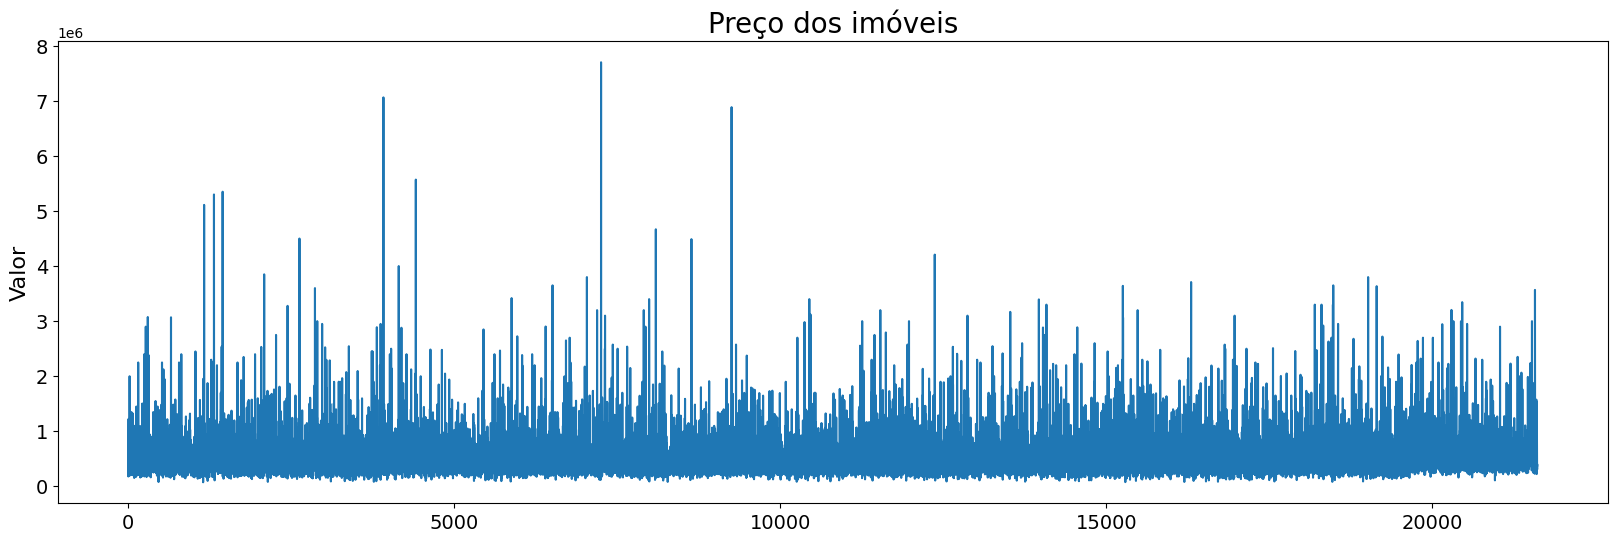

In [11]:
# REVER!!!
# Plotando a variável dependente
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Preço dos imóveis', fontsize=20)
ax.set_ylabel('Valor', fontsize=16)
#ax.set_xlabel('Valor', fontsize=16)
ax = df_num['price'].plot(fontsize=14)

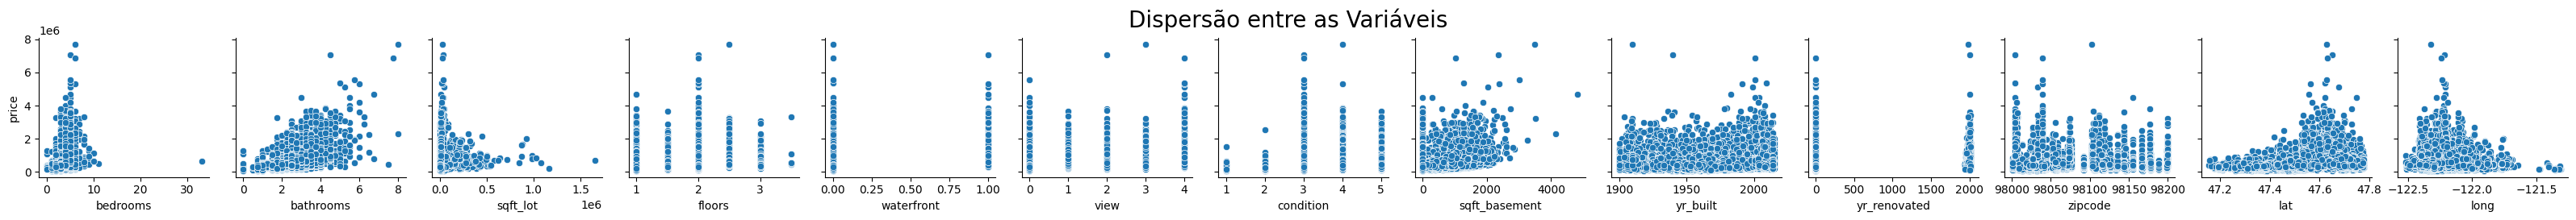

In [12]:
# Plotando o pairplot fixando somente uma variável dependente no eixo y
column_names = X.columns

ax = sns.pairplot(df_num, y_vars='price', x_vars=column_names)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [13]:
print(column_names)

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')


In [14]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [15]:
# Implementando a Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtendo o coeficiente de determinação (R²)
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.52


In [16]:
# Gerando previsões para os dados de TESTE (X_test)
y_previsto = modelo.predict(X_test)

# Obtendo o coeficiente de determinação (R²) para as previsões do modelo
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.51


In [17]:
# Metricas de desempenho do modelo de previsão do preço
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6.526893e+10
REQM,2.554778e+05
R²,5.100000e-01


In [18]:
# !pip install regressors

In [19]:
# # Analisando os resultados da tabela de regressao.
# from regressors import stats
# print("\n=========== SUMMARY ===========")
# xlabels = X.columns
# stats.summary(modelo, X, y, xlabels)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Preço - Previsão', ylabel='Preço - Real'>

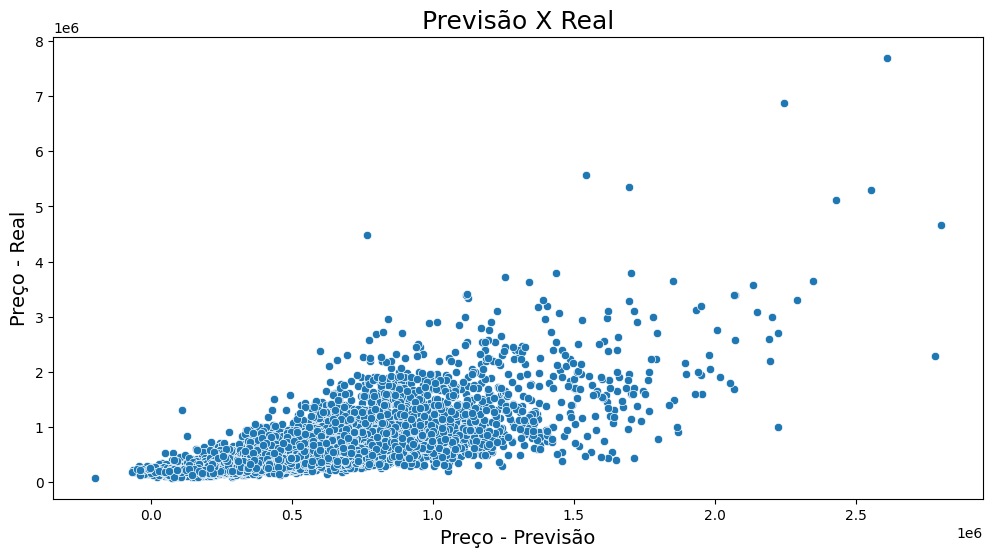

In [20]:
# Gerando as previsões do modelo para os dados de TREINO
y_previsto_train = modelo.predict(X_train)

# Gráfico de dispersão entre valor estimado e valor real
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Preço - Previsão', fontsize=14)
ax.set_ylabel('Preço - Real', fontsize=14)
ax


<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço - Previsão', ylabel='Resíduos'>

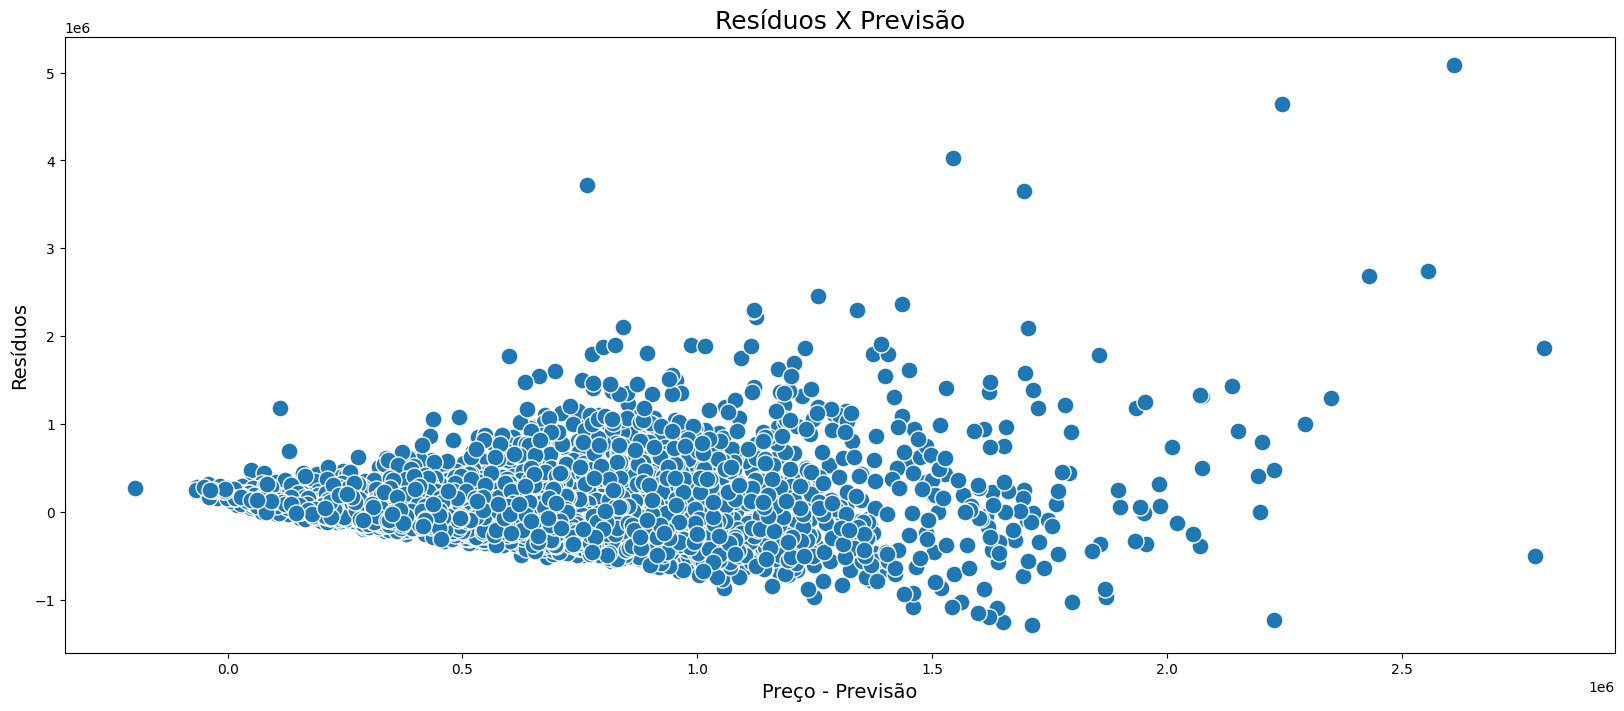

In [21]:
# Obtendo os resíduos
residuo = y_train - y_previsto_train

# Gráfico de dispersão entre valor estimado e resíduos
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Preço - Previsão', ylabel='Resíduos'>

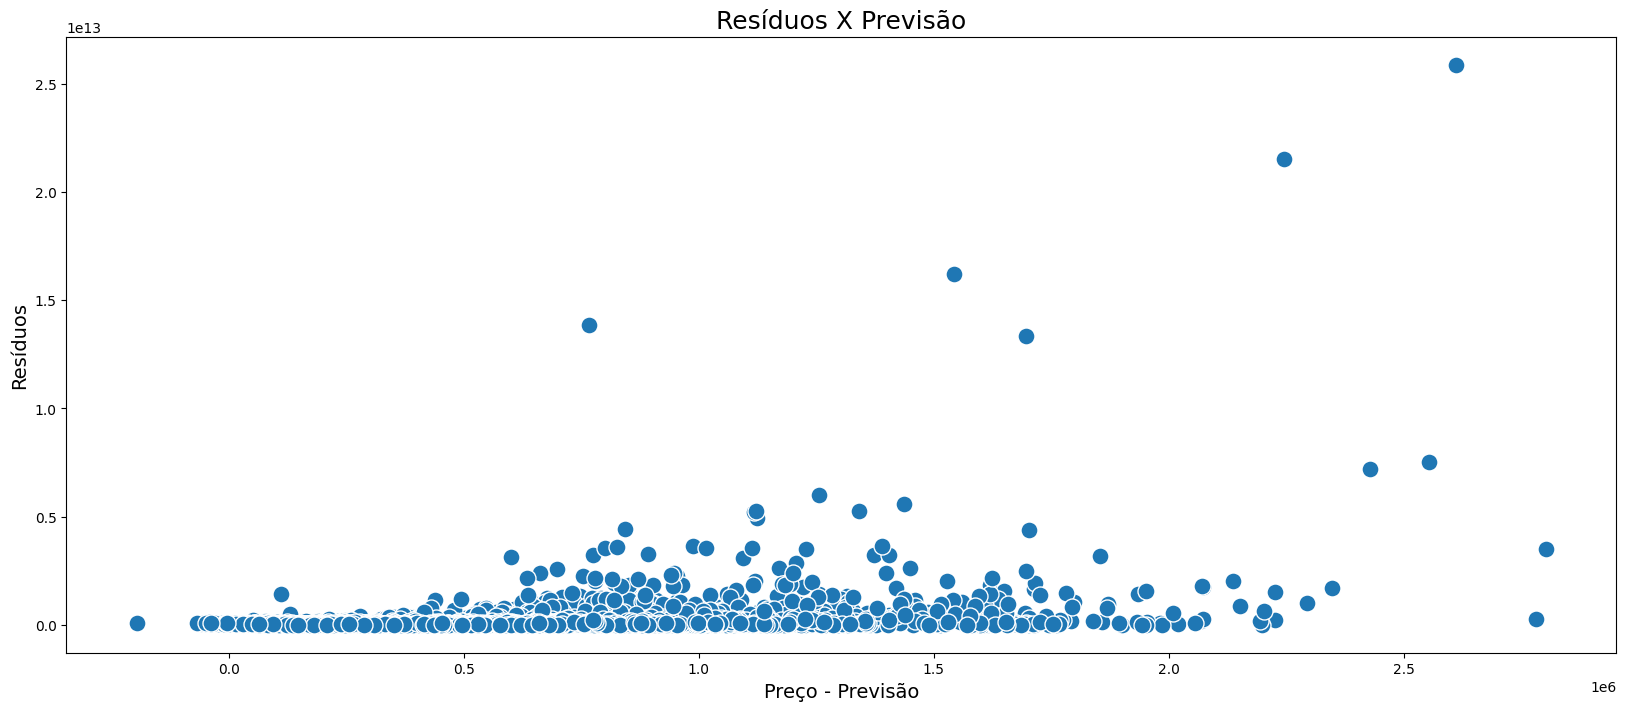

In [22]:
# Utilizando os resíduos ao quadrado

ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Preço', ylabel='Density'>

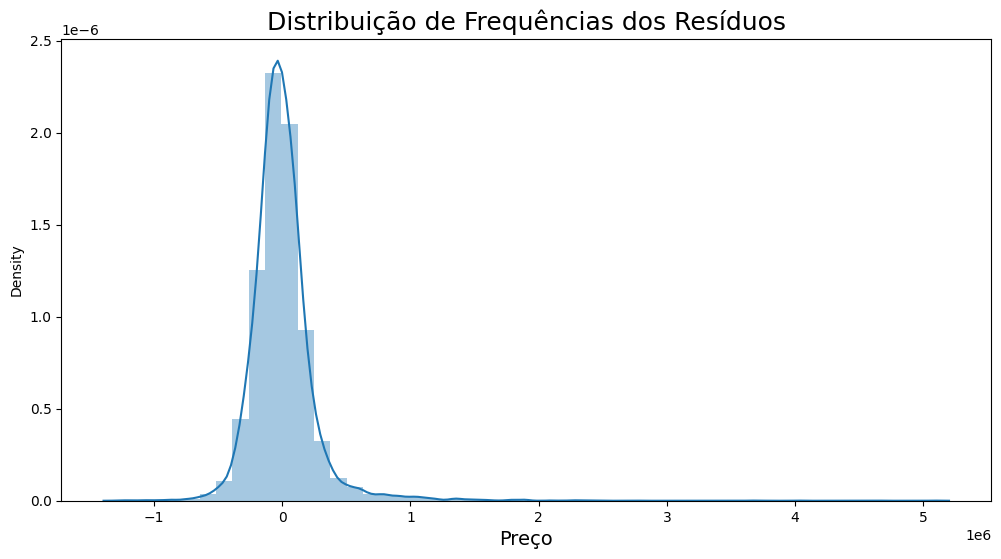

In [23]:
# Plotando a distribuição de frequências dos resíduos

ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Preço', fontsize=14)
ax

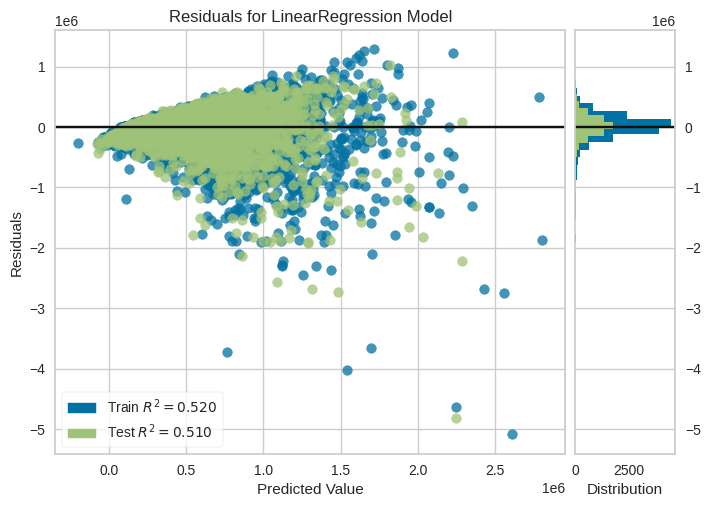

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [24]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(modelo)
visualizer.fit(X_train, y_train.values)  
visualizer.score(X_test, y_test.values)  
visualizer.show()  

# ESCREVER CONCLUSÃO!!!!

3 - Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo.

#### **Passo 1:** Salvar o modelo para uso posterior por meio do Pickle, eliminando a necessidade de treiná-lo a cada utilização.

In [25]:
# Criando um simulador
import pickle


output = open('modelo_preco_imovel.pkl', 'wb')
pickle.dump(modelo, output)
output.close()

# # salvando o modelo em um arquivo binário
# filename = './finalized_model.pkl'
# pickle.dump(modelo, open(filename, 'wb'))

# ### Lendo o modelo salvo posteriormente
# modelo_salvo = pickle.load(open(filename, 'rb'))
# result = modelo_salvo.predict(X_test[:1])
# print(result)

#### **Passo 2:** Integrar o modelo em uma aplicação, como por exemplo, uma API em Python desenvolvida com Flask. Isto possibilita a importação do modelo e a utilização dos dados recebidos na requisição como parâmetros para a realização de previsões. A seguir, demonstramos como importar o modelo usando o Pickle.

In [26]:
import pickle

# Lendo o modelo salvo
modelo = open('./modelo_preco_imovel.pkl','rb')
lm_new = pickle.load(modelo)
modelo.close()


bedrooms = 2
bathrooms =  2
sqft_lot = 7242
floors = 3.0
waterfront = 1
view = 1
condition = 5
sqft_basement = 500
yr_built = 1999
yr_renovated = 2011
zipcode = 98074
lat = 47.7210
long = -126.257

entrada = [[bedrooms, bathrooms, sqft_lot, floors, waterfront, view,
       condition, sqft_basement, yr_built, yr_renovated, zipcode,
       lat, long]]
print('{0:.2f} valor'.format(lm_new.predict(entrada)[0]))

1699579.82 valor
